In [2]:
'''
   Tema: Emissão de poluentes no Brasil
   Grupo: Lucas Ribeiro e Mônica Torres
   Fonte do dataset: http://dados.gov.br/dataset/emissoes-de-poluentes-atmosfericos
   Repositório: https://github.com/lrsonnewend/Trabalho-Estatistica
'''

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import stats
import statistics 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split




In [76]:
poluente = [] # vetor recebendo os poluentes
quantidade = [] # recebe as quantidades
qtdPolu = [] # recebe a quantidade específica do poluente "Material Particulado (MP)"

dados = open('poluentes.csv')
readerDados = csv.reader(dados, delimiter=';')

for i in readerDados:
    poluente.append(i[9])
    quantidade.append(i[10])

for i in range(len(poluente)):
    if(poluente[i] == 'Dióxido de enxofre'):
        qtdPolu.append(quantidade[i])
        
for i in range(len(qtdPolu)):
    qtdPolu[i] = qtdPolu[i].replace('.', '')
    qtdPolu[i] = qtdPolu[i].replace(',', '.')
    qtdPolu[i] = float(qtdPolu[i])
    
    
#Colunas de variáveis qualitativas:
    #Nominais: Razão social, Estado, Município, Categoria de atividade, Detalhe, Poluente emitido, Metodologia utilizada, Situação cadastral

#Colunas de variáveis quantitativas:
    #Contínua: CNPJ, Código da categoria, Código do detalhe, Ano, Quantidade
    
data.head()


,CNPJ,Razão Social,Estado,Município,Código da Categoria,Categoria de Atividade,Código do Detalhe,Detalhe,Ano,Poluente emitido,Quantidade,Metodologia utilizada,Situação Cadastral
0,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2014,Material Particulado (MP),"0,07",Estimativa,Ativa
1,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2015,Material Particulado (MP),"0,07",Estimativa,Ativa
2,00.003.390/0001-53,BIDY TECNOLOGIA DE COSMÉTICOS LTDA,SAO PAULO,JAGUARIUNA,15,Indústria Química,14,Fabricação de perfumarias e cosméticos,2016,Material Particulado (MP),"0,08",Estimativa,Ativa
3,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2014,Monóxido de carbono (CO),"3,00",Estimativa,Ativa
4,00.006.027/0001-91,"SERQUIMICA IND., COM., IMP. E EXP. DE PROD QUI...",SAO PAULO,SERTAOZINHO,15,Indústria Química,1,Produção de substâncias e fabricação de produt...,2015,Monóxido de carbono (CO),"3,00",Estimativa,Ativa


In [46]:
print('Quantidade de registros de poluentes da categoria Dióxido de enxofre: ', len(qtdPolu))
print('\nMédia: %.2f' %np.mean(qtdPolu))
print('Mediana: ', np.median(qtdPolu))
print('Moda: ',stats.mode(qtdPolu))
print('Coeficiente da variação: %.2f' %((np.std(qtdPolu)/np.mean(qtdPolu)) * 100))
print('Desvio padrão: %.2f' %np.std(qtdPolu))

Quantidade de registros de poluentes da categoria Dióxido de enxofre:  284

Média: 3824.02
Mediana:  35.515
Moda:  ModeResult(mode=array([137.41]), count=array([10]))
Coeficiente da variação: 700.95
Desvio padrão: 26804.39


In [88]:
data = pd.read_csv('poluentes.csv', sep=';')
print(pd.value_counts(data['Poluente emitido']).head())

Material Particulado (MP)     33779
Monóxido de carbono (CO)      15485
Óxidos de nitrogênio (NOx)    11632
Óxidos de enxofre (SOx)        7579
Dióxido de enxofre              284
Name: Poluente emitido, dtype: int64


In [44]:
for i in qtdPolu:
    print(i)

1020.99
1020.99
1020.99
1020.99
1020.99
107.13
862.75
2271.84
701.88
352.65
76.84
2153.1
23.58
486.83
463.23
293.57
240.17
236.95
1.09
1261.32
259.2
963.6
963.6
0.75
70.83
0.01
0.01
0.01
49170.0
0.0
1711.73
0.17
121.49
1.43
11.45
60.25
40.82
2.43
43.61
42.09
70.69
6.24
0.0
0.0
18.9
0.03
60.0
60.0
60.0
60.0
60.0
50.0
50.0
50.0
50.0
50.0
1.96
3.0
27.0
8.5
33.0
25.8
0.53
28.2
604.2
14.26
57.53
17.53
10.03
61.06
16.34
8.55
14.33
8.68
51.41
12.37
86.52
0.1
0.92
0.81
0.59
1.34
2.79
1.34
0.3
1752.0
21.9
278.0
21.4
57.4
5.4
0.38
53757.2
78840.0
0.7
0.71
1.0
1.92
326.98
500.78
0.33
0.15
101.84
47.93
6.15
59.21
13.82
23.08
8.32
45.55
0.96
3.5
352.15
1.49
6.13
7.0
609.7
0.79
2134.81
3.5
0.3
2.28
167.32
3.5
7.88
11.39
0.0
137.41
200.5
200.5
112.81
152.7
200.5
112.1
137.41
137.41
137.41
68.58
137.41
112.8
0.1
112.81
200.5
112.81
200.5
112.1
112.8
112.81
66.15
112.86
137.41
137.41
135.41
200.5
11.28
572.78
206.24
112.1
112.8
137.41
200.5
122.12
687.35
137.41
200.5
206.2
159.46
137.41
2.9
5.08
9.13
2

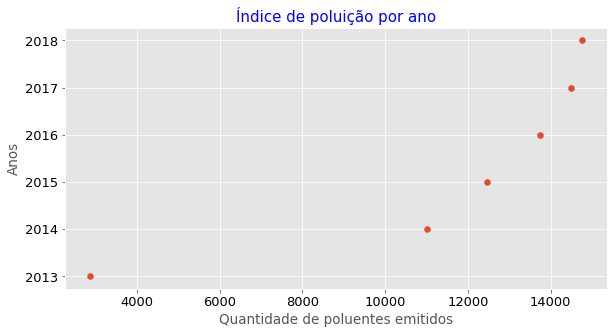

In [83]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9.7,4.8)
plt.rcParams['figure.facecolor'] = 'white'
quant = [2869, 11018, 12456, 13750, 14496, 14764]
years = ['2013', '2014', '2015', '2016', '2017', '2018']

plt.scatter(quant, years)

plt.xlabel('Quantidade de poluentes emitidos', fontsize = 13.5)
plt.ylabel('Anos', fontsize = 13.5)

plt.xticks(fontsize = 13, color = 'black')
plt.yticks(fontsize = 13, color = 'black')

plt.title('Índice de poluição por ano', color = 'blue', fontsize = 15)
plt.show()

In [84]:
#PROBABILIDADE - RESOLVENDO EXERCÍCIOS À PARTE 

#No lançamento de dois dados perfeitos,
#qual a probabilidade de que a soma dos resultados obtidos seja igual a 6?

#P(a) = n(a)/n(s)

#possíveis resultados
espacoAmostral = 6*6

#eventos que são favoráveis para soma ser igual a 6
eventoFavoravel = [(1,5), (3,3), (2,4), (4,2),(5,1)]

pA = (len(eventoFavoravel)/espacoAmostral) * 100

print('Probabilidade do evento ocorrer: %.2f'%pA,'%')

Probabilidade do evento ocorrer: 13.89 %


In [85]:
def fat(n):
    fat = 1
    i = 2
    while i <= n:
        fat = fat*i
        i = i + 1
    return fat


#Um teste de múltipla escolha é composto de 12 questões, 
#com 5 alternativas de resposta, sendo que somente uma, é correta.  
#Calcule a probabilidade de uma pessoa, marcando aleatoriamente as 12 questões, acertar metade das respostas.

#As chances de acerto são 1 em 5, que corresponde a 0,2 ou 20%.
chanceAcerto = 1/5

#As chances de erro são 4 em 5, que corresponde a 08 ou 80%.
chanceErro = 4/5

#formula do método binominal - considerando p = acerto e q = erro
#(n/k)*p^k * q^n-k
n = 12
k = 6
aux = n-k

probab = (fat(n)/(fat(k) * fat(n-k))) * (pow(chanceAcerto, k) * pow(chanceErro, (k-n)))

print('Probabilidade de %.2f'%(probab*100),'%')

Probabilidade de 22.56 %


Text(0, -1.3, '11.632')

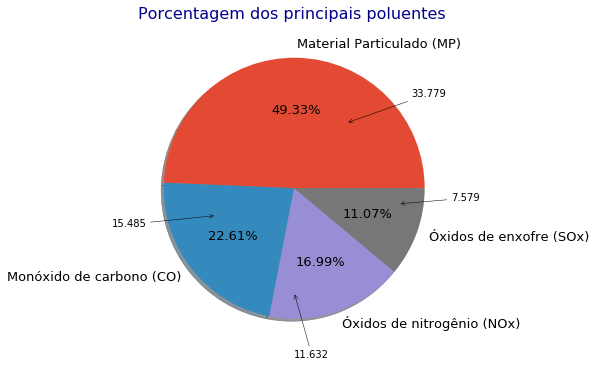

In [86]:
poluentes = pd.value_counts(data['Poluente emitido'])
poluentes = poluentes[:4]
poluentes

plt.style.use("ggplot")
poluentes.plot(kind='pie', subplots=True, shadow = True,
               label = "",  fontsize = 13,figsize=(11, 6), autopct='%.2f%%')
plt.title("Porcentagem dos principais poluentes ", fontsize = 16, color = 'darkblue')

plt.annotate("33.779", xy=(0.4, 0.5),
            xycoords='data',
            xytext=(0.9, 0.7),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("15.485", xy=(-0.6, -0.21),
            xycoords='data',
            xytext=(-1.4, -0.3),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("7.579", xy=(0.8, -0.12),
            xycoords='data',
            xytext=(1.2, -0.1),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))


plt.annotate("11.632", xy=(0, -0.8),
            xycoords='data',
            xytext=(0, -1.3),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

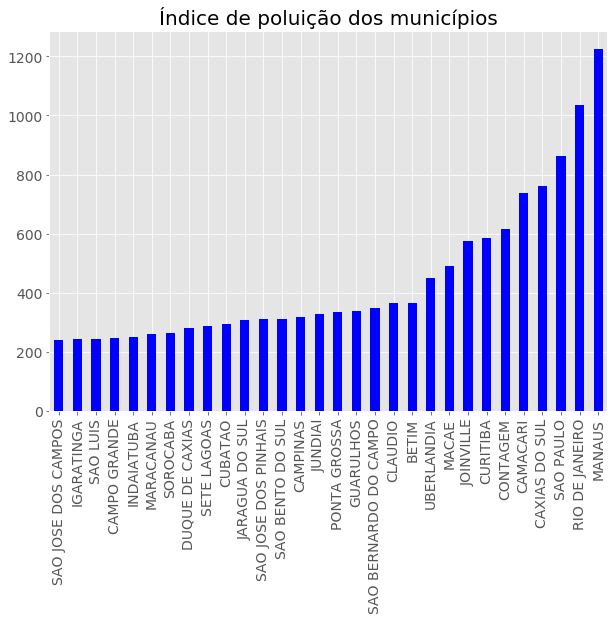

In [87]:
municipioPolu = pd.value_counts(data['Município'])
municipioPolu = municipioPolu[:30].sort_values(ascending=[True])
municipioPolu.plot(kind='bar', subplots=True, label="", figsize=(10, 7), fontsize = 14, color = 'blue')
plt.title('Índice de poluição dos municípios', fontsize = 20)
plt.xticks(rotation=90)